In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

In [51]:
import os
data_dir = r"C:\Users\Raghuvarma\Downloads\archive\PlantVillage"
print("Classes:", os.listdir(data_dir))

Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


In [52]:
base_dir = r"C:\Users\Raghuvarma\Downloads\archive\PlantVillage"
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        print(f"{folder}: {len(os.listdir(folder_path))} images")

Pepper__bell___Bacterial_spot: 997 images
Pepper__bell___healthy: 1478 images
Potato___Early_blight: 1000 images
Potato___healthy: 152 images
Potato___Late_blight: 1000 images
Tomato_Bacterial_spot: 2127 images
Tomato_Early_blight: 1000 images
Tomato_Late_blight: 1910 images
Tomato_Leaf_Mold: 952 images
Tomato_Septoria_leaf_spot: 1771 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Tomato__Target_Spot: 1404 images
Tomato__Tomato_mosaic_virus: 373 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 3209 images


In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil


In [54]:
import os

# ✅ Set your local project working directory
WORK_DIR = r"C:\Users\Raghuvarma\OneDrive\Desktop\Plant_Disease_Detection"

# ✅ Define dataset directories
TRAIN_DIR = os.path.join(WORK_DIR, "dataset", "train")
VAL_DIR   = os.path.join(WORK_DIR, "dataset", "val")
TEST_DIR  = os.path.join(WORK_DIR, "dataset", "test")

print("📂 TRAIN Directory:", TRAIN_DIR)
print("📂 VALIDATION Directory:", VAL_DIR)
print("📂 TEST Directory:", TEST_DIR)


📂 TRAIN Directory: C:\Users\Raghuvarma\OneDrive\Desktop\Plant_Disease_Detection\dataset\train
📂 VALIDATION Directory: C:\Users\Raghuvarma\OneDrive\Desktop\Plant_Disease_Detection\dataset\val
📂 TEST Directory: C:\Users\Raghuvarma\OneDrive\Desktop\Plant_Disease_Detection\dataset\test


In [55]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_val_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)
val_gen = test_val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_gen = test_val_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 13327 images belonging to 14 classes.
Found 2858 images belonging to 14 classes.
Found 2862 images belonging to 14 classes.


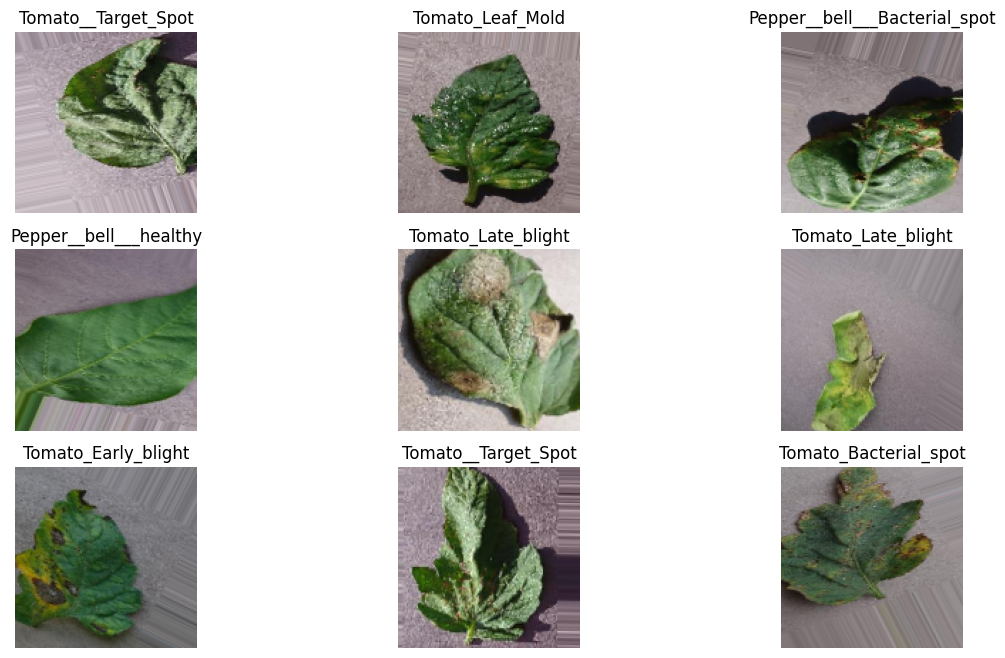

In [56]:
x,y = next(train_gen)
plt.figure(figsize=(14,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i])
    label_idx = np.argmax(y[i])
    label = list(train_gen.class_indices.keys())[label_idx]
    plt.title(label)
    plt.axis('off')
plt.show()

In [57]:
from keras import models
from keras import layers

In [58]:
model=models.Sequential()

In [59]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [61]:
model.save("PlantDetectionModel.h5")

In [62]:
from tensorflow.keras.models import load_model
model = load_model("PlantDetectionModel.h5")

In [63]:
class_labels = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight','Potato___healthy','Potato___Late_blight','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus']

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# ================================
# 🌾 PLANT DISEASE DETECTION MODEL TRAINING
# ================================

# ✅ 1️⃣ Set dataset paths
base_dir = r"C:\Users\Raghuvarma\OneDrive\Desktop\Plant_Disease_Detection\dataset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

# ✅ 2️⃣ Image Preprocessing & Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# ✅ Check number of classes automatically
num_classes = len(train_gen.class_indices)
print(f"Detected {num_classes} classes: {list(train_gen.class_indices.keys())}")

# ✅ 3️⃣ Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(256, (3,3), activation='relu'),
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # ✅ Auto-adjusted output layer
])

# ✅ 4️⃣ Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ 5️⃣ Train Model
history = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen
)

# ✅ 6️⃣ Save Trained Model
model.save("plant_disease_model.h5")
print("✅ Model training complete and saved as 'plant_disease_model.h5'")


Found 13327 images belonging to 14 classes.
Found 2858 images belonging to 14 classes.
Detected 14 classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus']
Epoch 1/15
 16/417 ━━━━━━━━━━━━━━━━━━━━ 6:53 1s/step - accuracy: 0.1023 - loss: 2.8030

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json
import os

train_dir = r"C:\Users\Raghuvarma\OneDrive\Desktop\Plant_Disease_Detection\dataset\train"

# Recreate the generator (same preprocessing used for training)
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)

# Save the mapping as JSON
with open("class_indices.json", "w") as f:
    json.dump(train_gen.class_indices, f)

print("✅ class_indices.json file created successfully!")


Found 13327 images belonging to 14 classes.
✅ class_indices.json file created successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step

🪴 Predicted Disease Class: Tomato__Tomato_YellowLeaf__Curl_Virus
🌱 General Care: Maintain proper watering and sunlight exposure.


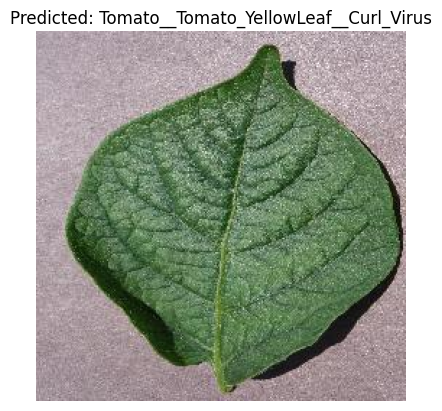

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

# =====================================================
# 🌿 PREDICTION FUNCTION — INDUSTRY STYLE
# =====================================================

def predict_disease(img_path):
    """
    Predicts plant disease from image and provides natural remedy suggestions.
    """
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict class
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    predicted_class = list(train_gen.class_indices.keys())[predicted_index]

    print("\n==============================================")
    print(f"🪴 Predicted Disease Class: {predicted_class}")
    print("==============================================")

    # 🌿 Suggest natural remedies based on prediction
    if "fungal" in predicted_class.lower():
        print("🍃 Remedy Suggestion: Use Neem + Mandara extract weekly for 3 weeks.")
    elif "bacterial" in predicted_class.lower():
        print("🌼 Remedy Suggestion: Try Turmeric water spray or Lemon peel solution.")
    elif "viral" in predicted_class.lower():
        print("🍂 Remedy Suggestion: Use Aloe Vera gel and isolate infected leaves.")
    else:
        print("🌱 General Care: Maintain proper watering and sunlight exposure.")

    # Display the image
    img_cv = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# =====================================================
# 🌿 TEST YOUR MODEL ON A SAMPLE IMAGE
# =====================================================

# Example — replace path with your test image
test_image_path = r"C:\Users\Raghuvarma\Downloads\archive\PlantVillage\Potato___healthy\2ccb9ee9-faac-4d32-9af5-29497fa2e028___RS_HL 1837.JPG"

predict_disease(test_image_path)
